# TUTOREL LSTM PAR OLIVIER

# Préparons l'environnement

In [21]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from ipywidgets import Output
from IPython.display import display

Les actions

In [22]:
FORWARD = 2
TURN_LEFT = 3
TURN_RIGHT = 4
FEEL_FRONT = 5

Le Small Loop

In [23]:
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3
FEELING = 2
BUMPING = 3

class SmallLoop():
    def __init__(self, poX, poY, direction):
        self.grid = np.array([
                [1, 1, 1, 1, 1],
                [1, 0, 0, 0, 1],
                [1, 0, 1, 0, 1],
                [1, 0, 0, 0, 1],
                [1, 1, 1, 1, 1]
        ])
        self.maze = self.grid.copy()
        self.poX = poX
        self.poY = poY
        self.direction = direction
        self.cmap = ListedColormap(['white', 'green', 'yellow', 'red'])
        self.norm = BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], self.cmap.N)

    def outcome(self, action):
        # print('before:', self.agent_position.strPosition(), action_dcit[action])
        self.maze[:,:] = self.grid
        result = 0
        
        if action == FORWARD:  # move forward
            # print('the action is move forward')
            # print(str(self.position.pointX)+': '+ str(self.position.pointY)+ ' ' +self.direction, action)
        
            if self.direction == LEFT:
                if self.maze[self.poX][self.poY - 1] == 0:
                    self.poY -= 1
                else:
                    self.maze[self.poX][self.poY - 1] = BUMPING
                    result = 1
            elif self.direction == DOWN:
                if self.maze[self.poX + 1][self.poY] == 0:
                    self.poX += 1
                else:
                    self.maze[self.poX + 1][self.poY] = BUMPING
                    result = 1
            elif self.direction == RIGHT:
                if self.maze[self.poX][self.poY + 1] == 0:
                    self.poY += 1
                else:
                    self.maze[self.poX][self.poY + 1] = BUMPING
                    result = 1
            elif self.direction == UP:
                if self.maze[self.poX - 1][self.poY] == 0:
                    self.poX -= 1
                else:
                    self.maze[self.poX - 1][self.poY] = BUMPING
                    result = 1
            # print(str(self.position.pointX)+': '+ str(self.position.pointY)+ ' ' +self.direction, action)
        elif action == TURN_RIGHT:
            if self.direction == LEFT:
                self.direction = UP
            elif self.direction == DOWN:
                self.direction = LEFT
            elif self.direction == RIGHT:
                self.direction = DOWN
            elif self.direction == UP:
                self.direction = RIGHT
        elif action == TURN_LEFT:
            if self.direction == LEFT:
                self.direction = DOWN
            elif self.direction == DOWN:
                self.direction = RIGHT
            elif self.direction == RIGHT:
                self.direction = UP
            elif self.direction == UP:
                self.direction = LEFT
        elif action == FEEL_FRONT:
            if self.direction == LEFT:
                if self.maze[self.poX][self.poY - 1] != 0:
                    result = 1
                self.maze[self.poX][self.poY - 1] = FEELING
            elif self.direction == DOWN:
                if self.maze[self.poX + 1][self.poY] != 0:
                    result = 1
                self.maze[self.poX + 1][self.poY] = FEELING
            elif self.direction == RIGHT:
                if self.maze[self.poX][self.poY + 1] != 0:
                    result = 1
                self.maze[self.poX][self.poY + 1] = FEELING
            elif self.direction == UP:
                if self.maze[self.poX - 1][self.poY] != 0:
                    result = 1
                self.maze[self.poX - 1][self.poY] = FEELING
        elif action == FEEL_LEFT:
            if self.direction == LEFT:
                if self.maze[self.poX + 1][self.poY] != 0:
                    result = 1
                self.maze[self.poX + 1][self.poY] = FEELING
            elif self.direction == DOWN:
                if self.maze[self.poX][self.poY + 1] != 0:
                    result = 1
                self.maze[self.poX][self.poY + 1] = FEELING
            elif self.direction == RIGHT:
                if self.maze[self.poX - 1][self.poY] != 0:
                    result = 1
                self.maze[self.poX - 1][self.poY] = FEELING
            elif self.direction == UP:
                if self.maze[self.poX][self.poY - 1] != 0:
                    result = 1
                self.maze[self.poX][self.poY - 1] = FEELING
        elif action == FEEL_RIGHT:
            if self.direction == LEFT:
                if self.maze[self.poX - 1][self.poY] != 0:
                    result = 1
                self.maze[self.poX - 1][self.poY] = FEELING
            elif self.direction == DOWN:
                if self.maze[self.poX][self.poY - 1] != 0:
                    result = 1
                self.maze[self.poX][self.poY - 1] = FEELING
            elif self.direction == RIGHT:
                if self.maze[self.poX + 1][self.poY] != 0:
                    result = 1
                self.maze[self.poX + 1][self.poY] = FEELING
            elif self.direction == UP:
                if self.maze[self.poX][self.poY + 1] != 0:
                    result = 1
                self.maze[self.poX][self.poY + 1] = FEELING
        # print(f"Line: {self.poX}, Column: {self.poY}, direction: {self.direction}")
        return result  
    
    def display(self):
        out.clear_output(wait=True)
        with out:
            fig, ax = plt.subplots()
            # ax.set_xticks([])
            # ax.set_yticks([])
            # ax.axis('off')
            # ax.imshow(self.maze, cmap='Greens', vmin=0, vmax=2)
            ax.imshow(self.maze, cmap=self.cmap, norm=self.norm)
            if self.direction == LEFT:
                # Y is column and X is line
                plt.scatter(self.poY, self.poX, s=200, marker='<')
            elif self.direction == DOWN:
                plt.scatter(self.poY, self.poX, s=200, marker='v')
            elif self.direction == RIGHT:
                plt.scatter(self.poY, self.poX, s=200, marker='>')
            else: # UP
                plt.scatter(self.poY, self.poX, s=200, marker='^')
            plt.show()


In [24]:
small_loop = SmallLoop(1, 1, 0)

In [25]:
# Run the interaction loop
step = 0
outcome = 0

# Display
out = Output()
small_loop.display()
display(out)

actions, outcomes = [], []
np.random.seed(0)

Output()

# Enregistrons des données d'expérience

In [26]:
for step in range(1, 50):
    # action = step % 4
    action = np.random.choice([FORWARD, TURN_LEFT, TURN_RIGHT, FEEL_FRONT])
    outcome = small_loop.outcome(action)
    small_loop.display()
    actions.append(action)
    outcomes.append(outcome)

print(actions)
print(outcomes)

[2, 5, 3, 2, 5, 5, 5, 5, 3, 5, 3, 4, 2, 5, 4, 2, 2, 2, 4, 3, 4, 5, 5, 4, 2, 3, 3, 3, 3, 2, 3, 2, 5, 2, 5, 3, 4, 5, 5, 2, 4, 5, 2, 3, 5, 3, 5, 5, 4]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0]


# Créons le dataset

In [27]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

class CustomDataSetRNN(Dataset):
    def __init__(self, actions:list, outcomes:list, dim_out:int, context_lenght:int, tokenizer=None):
        """
        Creates a custom dataset

        :param actions: list of actions
        :param outcomes: list of outcomes
        :param context_lenght: the length of the context
        :param tokenizer: tokenizer to encode the actions and outcomes
        """
        # Je ne suis pas sur d'y garder
        assert context_lenght % 2 != 0, "context_lenght must be odd"
        assert len(actions) == len(outcomes), "actions and outcomes must have the same length"
        assert context_lenght <= len(actions) * 2, "context_lenght must be less than or equal to the length of actions * 2"
        assert context_lenght > 0, "context_lenght can't be negative or zero"

        self.actions = actions
        self.outcomes = outcomes
        self.context_lenght = context_lenght
        self.tokenizer = tokenizer
        self.dim_out = dim_out

    def create_x(self, idx):
        gap = (self.context_lenght - 1) // 2
        x = []
        for i in range(idx, idx + gap):
            x.append(self.actions[i])
            x.append(self.outcomes[i])
        x.append(self.actions[idx + gap])
        y = self.outcomes[idx + gap]
        if self.tokenizer is not None:
            x = self.tokenizer.encode(x)
            y = self.tokenizer.encode(y)
        return x, y
        
                
    def __len__(self):
        gap = (self.context_lenght + 1) // 2
        return len(self.actions) + 1 - gap

    def __getitem__(self, idx):
        """
        Get the item at the index idx

        :param idx: index
        :return: x, y

        Example
        --------
        actions = ["a", "b", "c", "d", "e"] \n
        outcomes = ["1", "2", "3", "4", "5"] \n
        context_lenght = 3 \n
        dataset = CustomDataSet(actions, outcomes, context_lenght) \n
        dataset[0] -> (["a", "1", "b"], "2") \n
        dataset[1] -> (["b", "2", "c"], "3") \n
        dataset[2] -> (["c", "3", "d"], "4") \n
        dataset[3] -> (["d", "4", "e"], "5") \n
        """
        x = []
        x, label = self.create_x(idx)
        x = torch.tensor(x, dtype=torch.int)
        label = torch.tensor(label)
        return x, label

In [28]:
data_set = CustomDataSetRNN(actions=actions, outcomes=outcomes, context_lenght=5, dim_out=2)
print(data_set[0])

(tensor([2, 1, 5, 1, 3], dtype=torch.int32), tensor(0))


On crée le data_loader. 

On met le num_worker à 0 sinon on obtient une erreur de timeout.

In [29]:
from torch.utils.data import DataLoader

data_loader_train = DataLoader(data_set, batch_size=16, shuffle=True, num_workers=0, drop_last=True)

# Créons le LSTM

In [30]:
torch.manual_seed(0)

In [31]:
class LSTM(nn.Module):
    def __init__(self, num_emb, output_size, num_layers=1, hidden_size=128):
        super(LSTM, self).__init__()
        
        # Create an embedding layer to convert token indices to dense vectors
        self.embedding = nn.Embedding(num_emb, hidden_size)
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size, 
                            num_layers=num_layers, batch_first=True, dropout=0.5)
        
        # Define the output fully connected layer
        self.fc_out = nn.Linear(hidden_size, output_size)

    def forward(self, input_seq, hidden_in, mem_in):
        # Convert token indices to dense vectors
        input_embs = self.embedding(input_seq)

        # Pass the embeddings through the LSTM layer
        output, (hidden_out, mem_out) = self.lstm(input_embs, (hidden_in, mem_in))
                
        # Pass the LSTM output through the fully connected layer to get the final output
        return self.fc_out(output), hidden_out, mem_out

In [32]:
# Define the size of the hidden layer and number of LSTM layers
hidden_size = 64
num_layers = 1
len_vocab = 4 + 2 # 4 actions + 2 outcomes

# Create the LSTM classifier model
lstm_classifier = LSTM(num_emb=len_vocab, output_size=2, num_layers=num_layers, hidden_size=hidden_size).to("cpu")

c:\users\ogeorgeon\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [33]:
import torch.optim as optim

# Initialize the optimizer with Adam optimizer
optimizer = optim.Adam(lstm_classifier.parameters(), lr=0.01)

# Define the loss function as CrossEntropyLoss for classification
loss_fn = nn.CrossEntropyLoss()

# Entrainons 

In [34]:
# Initialize lists to store training and test loss, as well as accuracy
training_loss_logger = []
training_acc_logger = []

In [35]:
# Initialize training and test accuracy
train_acc = 0
test_acc = 0
device = "cpu"

# Loop through each epoch
for epoch in range(50):    
    # Set model to training mode
    lstm_classifier.train()
    steps = 0
    train_acc = 0
    
    # Iterate through training data loader
    for text, label in data_loader_train:
        bs = label.shape[0]
        

        # Initialize hidden and memory states
        hidden = torch.zeros(num_layers, bs, hidden_size, device=device)
        memory = torch.zeros(num_layers, bs, hidden_size, device=device)
        
        # Forward pass through the model
        pred, hidden, memory = lstm_classifier(text, hidden, memory)

        # Calculate the loss
        loss = loss_fn(pred[:, -1, :], label)
            
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Append training loss to logger
        training_loss_logger.append(loss.item())
        
        # Calculate training accuracy
        train_acc += (pred[:, -1, :].argmax(1) == label).sum()
        steps += bs
        print(f"acc : {train_acc/steps} / {train_acc} / {steps} for epoch {epoch}")
        
    # Calculate and append training accuracy for the epoch
    print(f"acc : {train_acc/steps} / {train_acc} / {steps} for epoch {epoch}")
    train_acc = train_acc / steps
    training_acc_logger.append(train_acc)



acc : 0.375 / 6 / 16 for epoch 0
acc : 0.5 / 16 / 32 for epoch 0
acc : 0.5 / 16 / 32 for epoch 0
acc : 0.8125 / 13 / 16 for epoch 1
acc : 0.84375 / 27 / 32 for epoch 1
acc : 0.84375 / 27 / 32 for epoch 1
acc : 1.0 / 16 / 16 for epoch 2
acc : 0.90625 / 29 / 32 for epoch 2
acc : 0.90625 / 29 / 32 for epoch 2
acc : 0.75 / 12 / 16 for epoch 3
acc : 0.8125 / 26 / 32 for epoch 3
acc : 0.8125 / 26 / 32 for epoch 3
acc : 0.75 / 12 / 16 for epoch 4
acc : 0.84375 / 27 / 32 for epoch 4
acc : 0.84375 / 27 / 32 for epoch 4
acc : 0.875 / 14 / 16 for epoch 5
acc : 0.875 / 28 / 32 for epoch 5
acc : 0.875 / 28 / 32 for epoch 5
acc : 1.0 / 16 / 16 for epoch 6
acc : 0.96875 / 31 / 32 for epoch 6
acc : 0.96875 / 31 / 32 for epoch 6
acc : 1.0 / 16 / 16 for epoch 7
acc : 0.96875 / 31 / 32 for epoch 7
acc : 0.96875 / 31 / 32 for epoch 7
acc : 0.9375 / 15 / 16 for epoch 8
acc : 0.90625 / 29 / 32 for epoch 8
acc : 0.90625 / 29 / 32 for epoch 8
acc : 1.0 / 16 / 16 for epoch 9
acc : 0.9375 / 30 / 32 for epoch 9


# Visualisons les résultats

In [36]:
def plot_acc(acc:list):
    plt.plot(acc)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()
    plt.close()

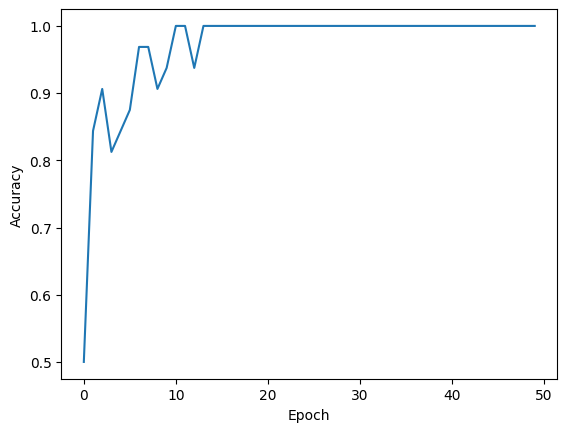

In [37]:
plot_acc(training_acc_logger)